<a href="https://colab.research.google.com/github/daisyKim12/Tensorflow_Study/blob/main/Lecture_C3_horses_or_humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Category 3

Image Classification using CNN

This task requires you to create a classifier for horses or humans using
the provided dataset.

Please make sure your final layer is a **1 neuron, activated by sigmoid** as shown.

Please note that the test will use images that are **300x300 with 3 bytes color** depth so be sure to design your neural network accordingly

# Import

In [ ]:
import urllib.request
import zipfile
import numpy as np
from IPython.display import Image

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

#Load Dataset

In [ ]:
_TRAIN_URL = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
_TEST_URL = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"

urllib.request.urlretrieve(_TRAIN_URL, 'horse-or-human.zip')

local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/horse-or-human/')
zip_ref.close()

urllib.request.urlretrieve(_TEST_URL, 'validation-horse-or-human.zip')
local_zip = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/validation-horse-or-human/')
zip_ref.close()

Visualization

Found 1027 images belonging to 2 classes.
(128, 300, 300, 3) (128, 2)
[1. 0.]


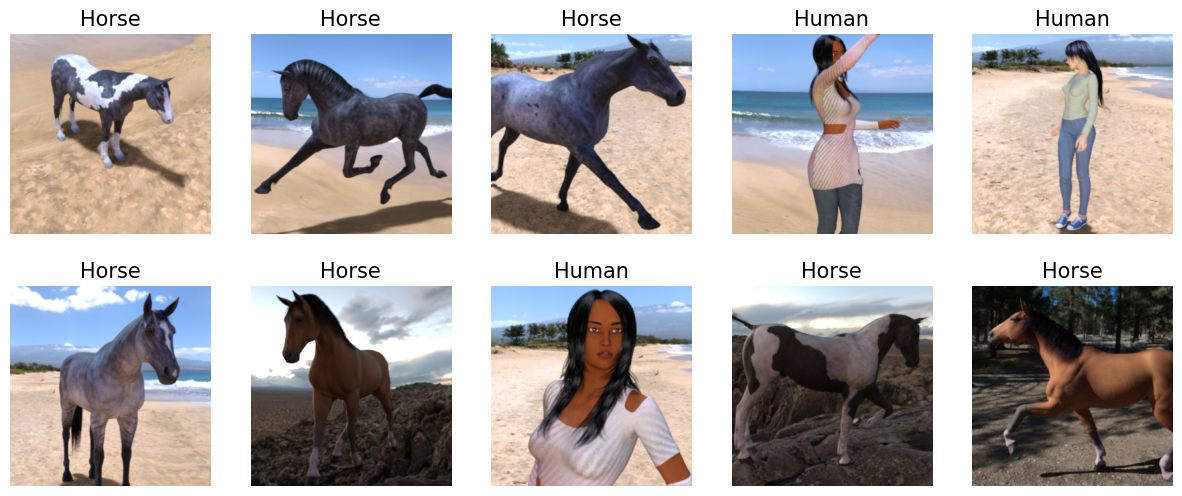

In [ ]:
import matplotlib.pyplot as plt

class_map = {
    0: 'Horse',
    1: 'Human',
}

original_datagen = ImageDataGenerator(rescale=1./255)
original_generator = original_datagen.flow_from_directory('tmp/horse-or-human/',
                                                          batch_size=128,
                                                          target_size=(300, 300),
                                                          class_mode='categorical'
                                                         )

for x, y in original_generator:
    print(x.shape, y.shape)
    print(y[0])

    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].set_title(class_map[y[i].argmax()], fontsize=15)
        axes[i//5, i%5].axis('off')
    break
plt.show()

# Preprocess (ImageDataGenerator)

In [ ]:
TRAINING_DIR = 'tmp/horse-or-human/'
VALIDATION_DIR = 'tmp/validation-horse-or-human/'

training data must be augmented to enhance the model performance

In [ ]:
training_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    width_shift_range = [-50, 50],
    height_shift_range = [-50, 50],
    horizontal_flip = True,
)

__Caution__: validation data is for evaluating so it must not be augmented

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1/255.0
)

Map ImageDataGenerator to tain and valid dataset

In [ ]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (300,300),
    batch_size=32,
    class_mode='categorical',
)

Found 1027 images belonging to 2 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (300,300),
    batch_size=32,
    class_mode='categorical',
)

Found 256 images belonging to 2 classes.


#Model

In [ ]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax'),

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

#Compile

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

#ModelCheckpoint

In [ ]:
checkpoint_path= "tmp_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

#Fit

In [ ]:
model.fit(train_generator, validation_data=validation_generator,
          epochs=25,
          callbacks=[checkpoint],
          )

Epoch 1/25
33/33 [==============================] - ETA: 0s - loss: 0.6803 - acc: 0.5336
Epoch 1: val_loss improved from inf to 0.72365, saving model to tmp_checkpoint.ckpt
33/33 [==============================] - 47s 954ms/step - loss: 0.6803 - acc: 0.5336 - val_loss: 0.7236 - val_acc: 0.5000
Epoch 2/25
33/33 [==============================] - ETA: 0s - loss: 0.6066 - acc: 0.6748
Epoch 2: val_loss did not improve from 0.72365
33/33 [==============================] - 30s 913ms/step - loss: 0.6066 - acc: 0.6748 - val_loss: 1.2174 - val_acc: 0.5039
Epoch 3/25
33/33 [==============================] - ETA: 0s - loss: 0.4813 - acc: 0.7702
Epoch 3: val_loss did not improve from 0.72365
33/33 [==============================] - 31s 934ms/step - loss: 0.4813 - acc: 0.7702 - val_loss: 2.4284 - val_acc: 0.5469
Epoch 4/25
33/33 [==============================] - ETA: 0s - loss: 0.4316 - acc: 0.8189
Epoch 4: val_loss did not improve from 0.72365
33/33 [==============================] - 29s 883ms/st

In [ ]:
model.load_weights(checkpoint_path)

#Predict

In [ ]:
model.evaluate(validation_generator)

8/8 [==============================] - 1s 159ms/step - loss: 0.5322 - acc: 0.8477


[0.5321828722953796, 0.84765625]